# Real or not disaster tweets



[Link Reto](https://www.kaggle.com/c/nlp-getting-started)


[base](https://www.kaggle.com/faressayah/natural-language-processing-nlp-for-beginners)

## Conect with Drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import packages

In [ ]:
import pandas as pd
import re
import numpy as np
import pickle
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
import os
os.chdir('/content/drive/Shared drives/Proyecto IA/str/')
import NLPtweet as tweet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load data and clean text

The module `NLPtweet` programing ownself, this containing diferent componets for proccess and analice tweets.

The `clean` fucntion remove special character like  *\x89Û¢*, expand the contractions; for explaple remplace *n't* for *not*, remove peunctuation, remove numbers, and convert the test to lower case.

In [ ]:
train = pd.read_csv('../data/train.csv')
test  = pd.read_csv('../data/test.csv')
train['sms'] = train['text'].apply(lambda x : tweet.clean(x))
train.head(2)

,id,keyword,location,text,target,sms
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada


In [ ]:
train.keyword.value_counts()

fatalities               45
armageddon               42
deluge                   42
damage                   41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [ ]:
print(train.sms.describe())

count                                                  7613
unique                                                 6920
top       watch this airport get swallowed up by a sands...
freq                                                     24
Name: sms, dtype: object


### Remove duplicates

We only like to wor with the text because this permitice than 

In [ ]:
sum(train.iloc[:,4:6].duplicated())

620

In [ ]:
train = train[train.iloc[:,4:6].duplicated() == False]
train[train['sms'].isin(list(train[train.iloc[:,5].duplicated()]['sms']))]

,id,keyword,location,text,target,sms
246,349,annihilation,NaN,U.S National Park Services Tonto National Fore...,0,us national park services tonto national fores...
248,353,annihilation,Subconscious LA,World Annihilation vs Self Transformation http...,0,world annihilation vs self transformation ali...
251,356,annihilation,CA physically- Boston Strong?,U.S National Park Services Tonto National Fore...,1,us national park services tonto national fores...
269,390,annihilation,Subconscious LA,World Annihilation vs Self Transformation http...,1,world annihilation vs self transformation ali...
347,498,army,NaN,One Direction Is my pick for http://t.co/q2eBl...,0,one direction is my pick for fan army directi...
...,...,...,...,...,...,...
6837,9794,trapped,NaN,Hollywood Movie About Trapped Miners Released ...,1,hollywood movie about trapped miners released ...
7056,10110,upheaval,Oregon,A look at state actions a year after Ferguson'...,0,a look at state actions a year after fergusons...
7085,10147,upheaval,"Milwaukee, WI",A Look at State Actions a Year After #Ferguson...,1,a look at state actions a year after fergusons...
7391,10576,windstorm,"Friendswood, TX",TWIA board approves 5 percent rate hike: The T...,0,twia board approves percent rate hike the tex...


In [ ]:
train = train[train['sms'].isin(list(train[train.iloc[:,5].duplicated()]['sms'])) == False]
train.shape

(6847, 6)

In [ ]:
print(train[train['target'] == 1].shape, train[train['target'] == 0].shape)

(2801, 6) (4046, 6)


## Explore data

Compare lenght of the message

Text(0.5, 0, 'Message Length')

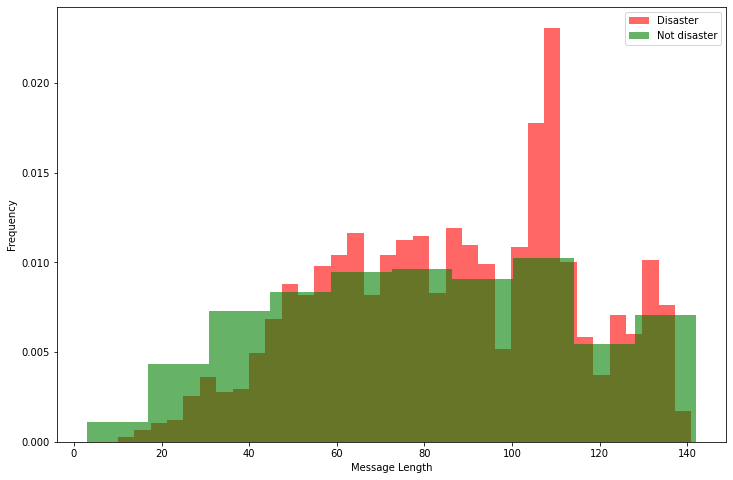

In [ ]:
plt.figure(figsize=(12, 8))
train[train.target==1].sms.apply(len).plot(bins=35, kind='hist', color='red', 
                                       label='Disaster', alpha=0.6, density=1)
train[train.target==0].sms.apply(len).plot(kind='hist', color='green', 
                                       label='Not disaster', alpha=0.6,density=1)
plt.legend()
plt.xlabel("Message Length")

Compare words for Real or not diasas
ter

In [ ]:
print(tweet.Compare_most_common(tweet.concat(train[train.target==1], 'sms').split(),
                                tweet.concat(train[train.target==0], 'sms').split(), 150))

['the', 'in', 'a', 'of', 'to', 'is', 'and', 'on', 'for', 'i', 'at', 'it', 'from', 'that', 'not', 'by', 'are', 'was', 'with', 'fire', 'this', 'have', 'after', 'you', 'as', 'my', 'an', 'be', 'but', 'no', 'via', 'has', 'we', 'over', 'will', 'when', 'news', 'people', 'up', 'do', 'like', 'us', 'just', 'more', 'out', 'emergency', 'were', 'so', 'am', 'what', 'they', 'about', 'all', 'now', 'been', 'there', 'who', 'me', 'one', 'how', 'into', 'than', 'if', 'your', 'burning', 'video', 'he', 'off', 'had', 'or', 'man', 'get', 'first', 'would', 'some', 'new', 'our', 'could', 'down', 'still', 'time', 'may', 'today', 'back', 'say', 'world', 'its', 'can', 'her', 'being', 'their', 'day', 'here', 'rt']


remove_list = ["the", "a", "i", "to", "and", "of", "is",
               "in", "you", "my", "not", "for", "it", "on", "that",
               "with", "are", "out", "have", "be", "am", "this",
               "like", "by", "do", "me", "will", "so", "just","was",
               "your", "but", "at", "all", "up", "he", "from", "we",
               "they", "has", "or", "if", "as", "no", "what", "an",
               "now", "when", "one", "how", "there", "us","been",
               "via", "more", "people", "into", "who", "new",
               "emergency", "video", "after", "had", "over", "off"]
               
train['sms'] = train['sms'].apply(lambda x: tweet.remove(x, remove_list))

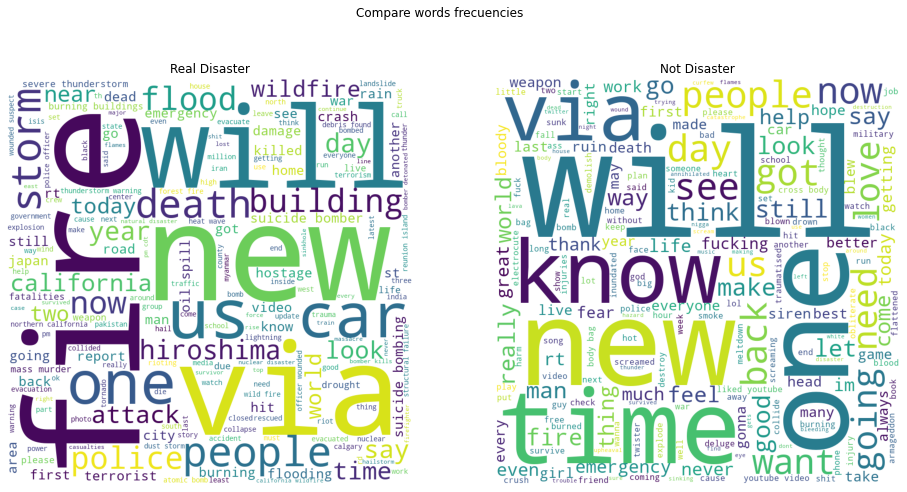

In [ ]:
tweet.plot_wordsclouds(tweet.concat(train[train['target'] == 1],'sms'),
                       tweet.concat(train[train['target'] == 0],'sms'))

## Other clean

In [ ]:
train['sms2'] = train['text'].apply(lambda x : tweet.clean2(x))

In [ ]:
from collections import Counter
w = Counter(tweet.concat(train, 'sms2').split())
w1 = Counter(tweet.concat(train[train.target==1], 'sms2').split())
w0 = Counter(tweet.concat(train[train.target==0], 'sms2').split())
print("total:    ", w.most_common)
print("real:     ", w1.most_common)
print("not real: ", w0.most_common)

total:     <bound method Counter.most_common of Counter({'fire': 184, 'people': 138, 'emergency': 129, 'new': 121, 'news': 109, 'video': 104, 'off': 103, 'police': 102, 'body': 100, 'nuclear': 91, 'disaster': 90, 'burning': 89, 'buildings': 88, 'time': 86, 'storm': 86, 'still': 85, 'crash': 83, 'dead': 82, 'man': 80, 'world': 80, 'down': 78, 'fires': 75, 'ca': 74, 'know': 74, 'killed': 74, 'see': 72, 'attack': 70, 'suicide': 70, 'life': 69, 'war': 69, 'make': 67, 'mass': 67, 'car': 66, 'say': 66, 'california': 65, 'pm': 65, 'train': 65, 'accident': 64, 'bomb': 64, 'home': 63, 'hiroshima': 62, 'way': 60, 'love': 60, 'old': 55, 'help': 54, 'good': 54, 'collapse': 54, 'let': 54, 'bombing': 53, 'take': 51, 'getting': 50, 'school': 50, 'rt': 50, 'look': 49, 'city': 49, 'via': 49, 'think': 49, 'death': 48, 'damage': 47, 'full': 47, 'coming': 46, 'please': 46, 'right': 46, 'during': 46, 'work': 46, 'hit': 45, 'forest': 45, 'need': 44, 'weather': 44, 'watch': 44, 'army': 43, 'floods': 43, 'wre

the idea is that the model aren't dependent from the place, for that are most util for any twitter, for this we remove the words that localice the tweet in a particular place

In [ ]:
sector_list = ["california", "#japan", "japan", "island", "calgary", "obama", "malaysia",
"american", "turkey", "iran", "virgin", "india", "china", "pakistan", "fedex",
"alabama", "israeli", "libya", "washington", "brithish", "new york", "russia",
"japanese", "indian", "saipan", "rusian", "nigerian", "colorado", "france",
"texas", "oklahoma", "canada", "pakisstani", "israel", "palestinian", "malaysian",
"madhya", "philippines", "hawaii", "french", "udhampur", "gaza", "australia", "arabia",
"mediterranean", "mexico", "brazil", "newyork", "nyc", "italy", "yyc", "fukushima",
"afghanistan", "nashville", "usagov", "chinese", "iraq", 
"chicago", "denver", "mansehra", "pakistan", "portland",  "vietnam", "enugu", "georgia",
"turkish"]


train["sms2"] = train["sms2"].apply(lambda x: tweet.remove(x, sector_list))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus2 = tweet.corpus(train, 'sms2')
vect  = CountVectorizer()
x2     = vect.fit_transform(corpus2)
X2 = vect.transform(train['sms2'])
X2.shape[1]

13818

now we remove the words that repeat less than 5 times

In [ ]:
remov = []
for key in w.keys(): 
  if w[key] < 5:
    remov.append(key)
print(remov)
train["sms2"] = train["sms2"].apply(lambda x: tweet.remove(x, remov))

['deeds', 'forgiveforest', 'ronge', 'sask', 'canadaresidents', 'helter', 'notified', 'receive', 'californiasent', 'ruby', 'pours', 'schoolrockyfire', 'directions', 'cafire', 'wildfiresflood', 'manitou', 'springs', 'areastop', 'woodsemergency', 'streetafraid', 'areapeople', 'farhaha', 'tampa', 'flooded', 'hah', 'fvck', 'floodingraining', 'tampabay', 'countflood', 'bago', 'bagodamage', 'multi', 'breakingmanlove', 'fruitssummer', 'lovelycar', 'fastgoooooooaaaaaalridiculouslondon', 'coollove', 'skiingwonderfulloooooolway', 'shitnyc', 'weeklove', 'girlfriendcoooolpastawholesale', 'ablazetry', 'rtafricanbaze', 'nigeria', 'abacrying', 'ablazeplus', 'ablazemufc', 'hype', 'acquisitions', 'doubt', 'epl', 'seasoninec', 'abia', 'ablazebarbados', 'bridgetown', 'jamaica', 'santa', 'elizabeth', 'superintendeablaze', 'lordcheck', 'nsfwablaze', 'deadawesome', 'visiting', 'cfc', 'ancop', 'tita', 'vida', 'caresoooo', 'pumped', 'ablazewanted', 'preaching', 'hotelgained', 'stats', 'growwest', 'alonebuildin

Text(0.5, 0, 'Message Length')

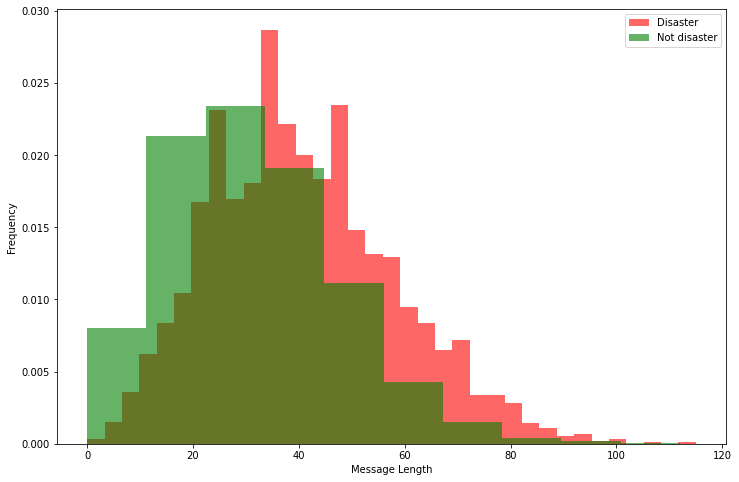

In [ ]:
plt.figure(figsize=(12, 8))
train[train.target==1].sms2.apply(len).plot(bins=35, kind='hist', color='red', 
                                       label='Disaster', alpha=0.6, density=1)
train[train.target==0].sms2.apply(len).plot(kind='hist', color='green', 
                                       label='Not disaster', alpha=0.6,density=1)
plt.legend()
plt.xlabel("Message Length")

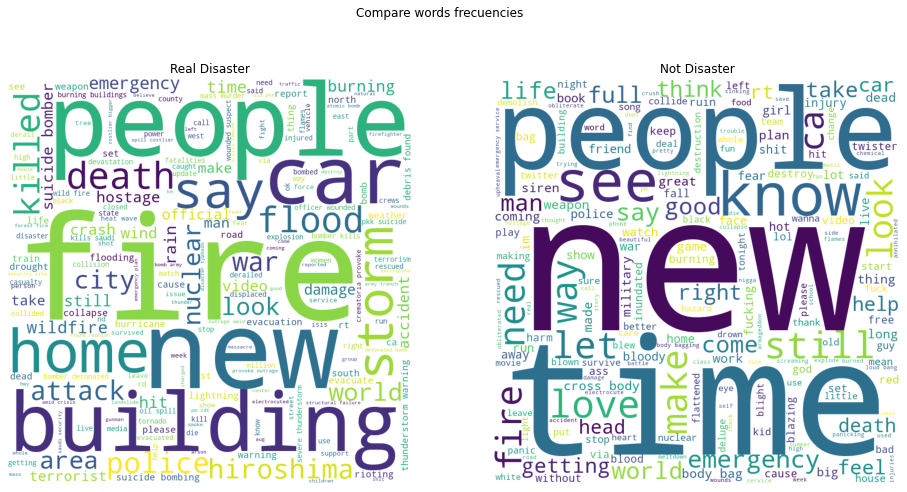

In [ ]:
tweet.plot_wordsclouds(tweet.concat(train[train['target'] == 1],'sms2'),
                       tweet.concat(train[train['target'] == 0],'sms2'))

# web componets

In [ ]:
train["web_comp"] = train['text'].apply(lambda x : tweet.extract_web_comp(x))
train.head(2)

,id,keyword,location,text,target,sms,sms2,web_comp
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,reason earthquake allah forgive,#earthquake
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,forest fire la,


Text(0.5, 0, 'Message Length')

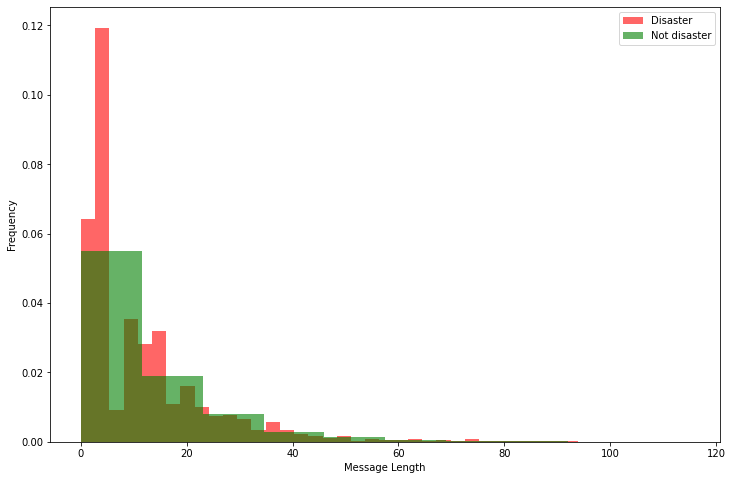

In [ ]:
plt.figure(figsize=(12, 8))
train[train.target==1].web_comp.apply(len).plot(bins=35, kind='hist', color='red', 
                                       label='Disaster', alpha=0.6, density=1)
train[train.target==0].web_comp.apply(len).plot(kind='hist', color='green', 
                                       label='Not disaster', alpha=0.6,density=1)
plt.legend()
plt.xlabel("Message Length")

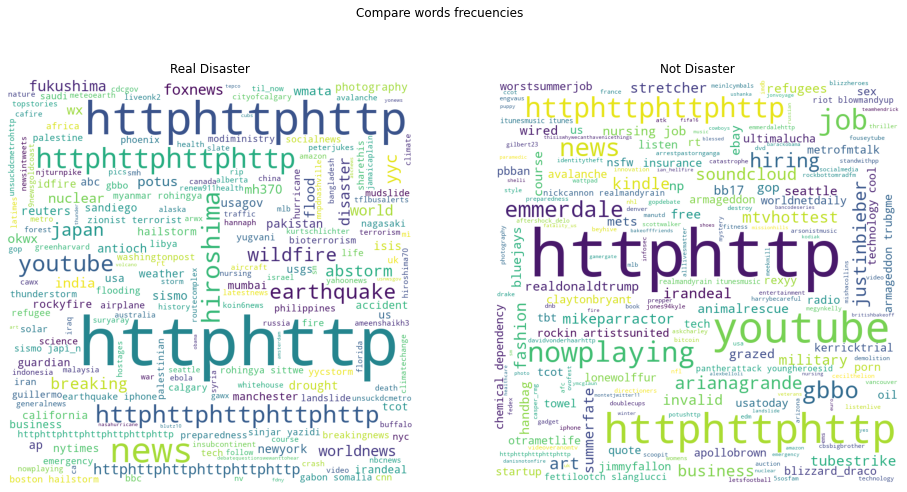

In [ ]:
tweet.plot_wordsclouds(tweet.concat(train[train['target'] == 1],'web_comp'),
                       tweet.concat(train[train['target'] == 0],'web_comp'))

## Metric

In [ ]:
def metric(estimator, X, y):
  from sklearn.metrics import precision_score, recall_score
  pre = precision_score(y, estimator.predict(X))
  rec = recall_score(y, estimator.predict(X))
  val = 2* (pre*rec)/(pre+rec)
  return val

### Bag of Words (BOW)

We based in metodology post by [freeCodeCamp](https://www.freecodecamp.org/news/an-introduction-to-bag-of-words-and-how-to-code-it-in-python-for-nlp-282e87a9da04/) and finaly used [scikit](https://scikit-learn.org/stable/modules/feature_extraction.html)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#Whit sms1
corpus = tweet.corpus(train, 'sms')
vect  = CountVectorizer()
x     = vect.fit_transform(corpus)
X = vect.transform(train['sms'])
y = train['target'].values

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100) 
pca1 = pca.fit_transform(X.toarray())
pca2 = pca.fit_transform(X2.toarray())

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#with sms2
corpus2 = tweet.corpus(train, 'sms2')
vect  = CountVectorizer()
x2     = vect.fit_transform(corpus2)
X2 = vect.transform(train['sms2'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#with sms2
corpus3 = tweet.corpus(train, "web_comp")
vect  = CountVectorizer()
x3     = vect.fit_transform(corpus2)
X3 = vect.transform(train["web_comp"])

In [ ]:
print("corpus 1: %s corpus 2: %s corpus 3: %s" % (X.shape[1], X2.shape[1], X3.shape[1] ))

corpus 1: 16757 corpus 2: 4282 corpus 3: 4282


## Emmbeding

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
Z = embed(train['sms'].values)
Z.shape

TensorShape([6847, 512])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100) 
cZ=pca.fit_transform(Z)

In [ ]:
Z2 = embed(train['sms2'].values)
Z2.shape

TensorShape([6847, 512])

In [ ]:
Z3 = embed(train["web_comp"].values)
Z3.shape

TensorShape([6847, 512])

In [ ]:
Z.shape

TensorShape([6847, 512])

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=.05),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
import sklearn

**Pruebas con redes**

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=.05),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
prueba1=model.fit(Z,y, epochs=128, batch_size=32,validation_split=0.3)#metrica y matriz de confusion complementar con test

In [ ]:
model.save("/content/test1.h5")

In [ ]:
modelo1=tf.keras.models.load_model("/content/test1.h5")
modelo1.summary()

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.05),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
prueba2=model.fit(Z,y, epochs=128, batch_size=32,validation_split=0.3)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


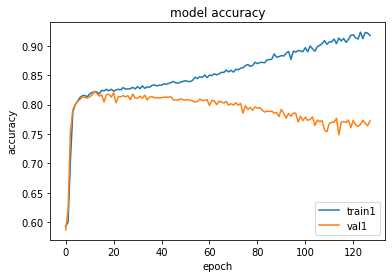

In [ ]:
print(prueba1.history.keys())
plt.plot(prueba1.history['accuracy'])
plt.plot(prueba1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train1', 'val1','train2','val2'], loc='lower right')
plt.show()

In [ ]:
max(prueba1.history.get("val_accuracy"))

0.8223844170570374

In [ ]:
max(prueba2.history.get("val_accuracy"))

0.8155717849731445

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


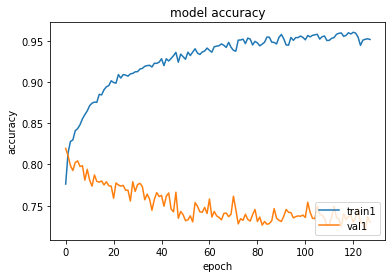

In [ ]:
print(prueba2.history.keys())
plt.plot(prueba2.history['accuracy'])
plt.plot(prueba2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train1', 'val1','train2','val2'], loc='lower right')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


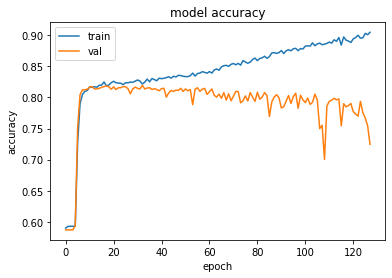

In [ ]:
print(prueba.history.keys())
plt.plot(prueba.history['accuracy'])
plt.plot(prueba.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=.05),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
prueba3=model.fit(Z,y, epochs=128, batch_size=32,validation_split=0.3)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


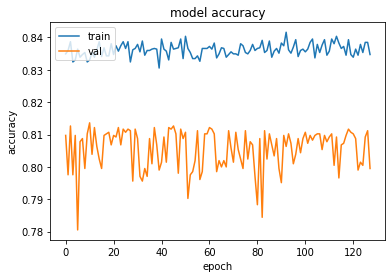

In [ ]:
print(prueba3.history.keys())
plt.plot(prueba3.history['accuracy'])
plt.plot(prueba3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=.05),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
prueba4=model.fit(Z,y, epochs=128, batch_size=32,validation_split=0.3)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


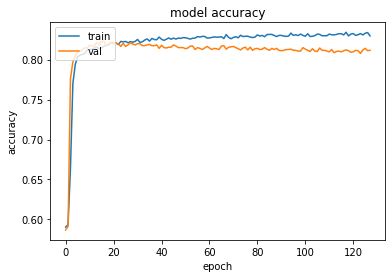

In [ ]:
print(prueba4.history.keys())
plt.plot(prueba4.history['accuracy'])
plt.plot(prueba4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
max(prueba4.history.get("val_accuracy"))

0.8228710293769836

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=.05),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
prueba5=model.fit(Z,y, epochs=128, batch_size=32,validation_split=0.3)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


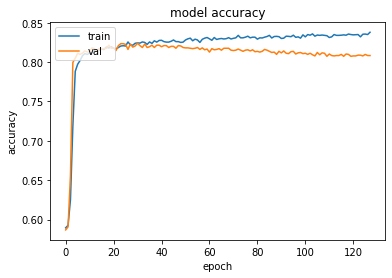

In [ ]:
print(prueba5.history.keys())
plt.plot(prueba5.history['accuracy'])
plt.plot(prueba5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
a=np.zeros(6)
a[0]=max(prueba1.history.get("val_accuracy"))
a[1]=max(prueba2.history.get("val_accuracy"))
a[2]=max(prueba3.history.get("val_accuracy"))
a[3]=max(prueba4.history.get("val_accuracy"))
a[4]=max(prueba5.history.get("val_accuracy"))
a[5]=max(prueba6.history.get("val_accuracy"))
a

array([0.82238442, 0.81557178, 0.81362528, 0.82287103, 0.82384425,
       0.82335764])

In [ ]:
marco=pd.DataFrame.from_dict(prueba5.history)

In [ ]:
marco

,loss,accuracy,val_loss,val_accuracy
0,0.676034,0.589524,0.664976,0.586861
1,0.654710,0.592654,0.641672,0.590754
2,0.628370,0.625209,0.610001,0.655961
3,0.592145,0.718698,0.568272,0.799513
4,0.549888,0.788189,0.523602,0.804866
...,...,...,...,...
123,0.364266,0.832012,0.429513,0.808759
124,0.364611,0.835351,0.426685,0.807786
125,0.363637,0.835559,0.429491,0.809732
126,0.363283,0.834933,0.427948,0.808272


In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.05),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
prueba6=model.fit(Z,y, epochs=128, batch_size=32,validation_split=0.3)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


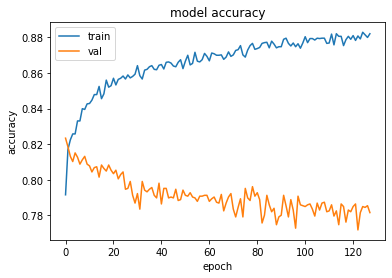

In [ ]:
print(prueba6.history.keys())
plt.plot(prueba6.history['accuracy'])
plt.plot(prueba6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=.05),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
Z2
Z3
pca1
pca2


In [ ]:
pruebaZ2=model.fit(Z2,y, epochs=128, batch_size=32,validation_split=0.3)

In [ ]:
pruebaZ3=model.fit(Z3,y, epochs=128, batch_size=32,validation_split=0.3)

In [ ]:
pca1=np.int32(pca1)
pruebapca1=model.fit(pca1,y, epochs=128, batch_size=32,validation_split=0.3)

In [ ]:
pca2=np.int32(pca2)
pruebapca2=model.fit(pca1,y, epochs=128, batch_size=32,validation_split=0.3)

In [ ]:
print(max(pruebaZ2.history.get("val_accuracy")))
print(max(pruebaZ3.history.get("val_accuracy")))
print(max(pruebapca1.history.get("val_accuracy")))
print(max(pruebapca2.history.get("val_accuracy")))


0.7995133996009827
0.6817518472671509
0.6170316338539124
0.6267639994621277


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


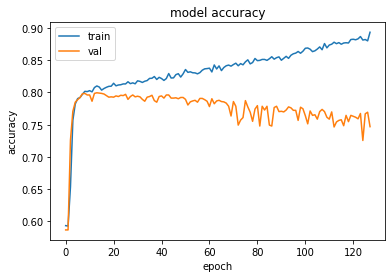

In [ ]:
print(pruebaZ2.history.keys())
plt.plot(pruebaZ2.history['accuracy'])
plt.plot(pruebaZ2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


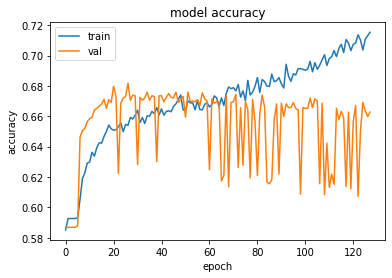

In [ ]:
print(pruebaZ3.history.keys())
plt.plot(pruebaZ3.history['accuracy'])
plt.plot(pruebaZ3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


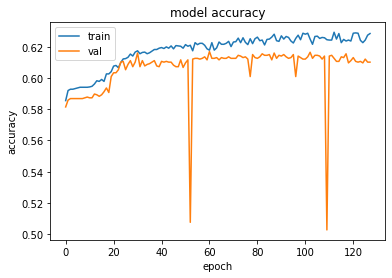

In [ ]:
print(pruebapca1.history.keys())
plt.plot(pruebapca1.history['accuracy'])
plt.plot(pruebapca1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


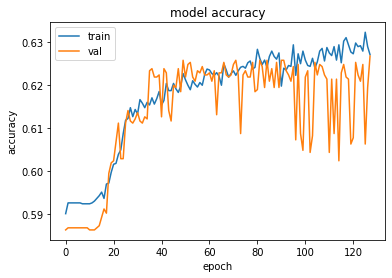

In [ ]:
print(pruebapca2.history.keys())
plt.plot(pruebapca2.history['accuracy'])
plt.plot(pruebapca2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=.05),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
pca1=np.int32(pca1)
pruebapca1_2=model.fit(pca1,y, epochs=128, batch_size=32,validation_split=0.3)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


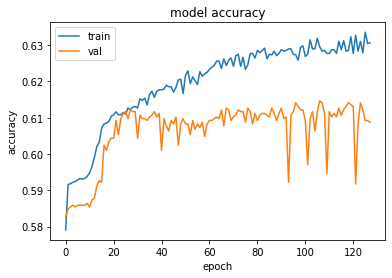

In [ ]:
print(pruebapca1_2.history.keys())
plt.plot(pruebapca1_2.history['accuracy'])
plt.plot(pruebapca1_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
max(prueba6.history.get("accuracy"))

0.8829298615455627

In [ ]:
model.fit(cZ,y, epochs=20, batch_size=1)

In [ ]:
model.fit(Z2,y, epochs=10, batch_size=1)